In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import re
import numpy as np

In [3]:
# Cargar el dataset
df = pd.read_excel('https://github.com/guillelezama/eda_course/raw/main/data/raw/canciones.xlsx')

# Información general sobre el DataFrame
print("\nInformación general del DataFrame:")
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  10 non-null     object
 1   cancion     10 non-null     object
 2   artista     10 non-null     object
 3   letra       10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes
None


In [4]:
# Función para limpiar texto: eliminar caracteres especiales y normalizar acentos
def clean_text(text):
    # Eliminar caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)
    # Normalizar acentos
    text = re.sub(r'[áÁ]', 'a', text)
    text = re.sub(r'[éÉ]', 'e', text)
    text = re.sub(r'[íÍ]', 'i', text)
    text = re.sub(r'[óÓ]', 'o', text)
    text = re.sub(r'[úÚ]', 'u', text)
    text = text.lower()
    return text

# Aplicar la función de limpieza a la columna 'letra'
df['letra'] = df['letra'].apply(clean_text)


In [5]:
# Añadir una columna con la cantidad de palabras en cada letra
df['word_count'] = df['letra'].apply(lambda x: len(x.split()))

# Mostrar estadísticas descriptivas de la cantidad de palabras
print("\nEstadísticas descriptivas de la cantidad de palabras en cada letra:")
print(df['word_count'].describe())

# Dato Curioso: Mostrar la canción más larga y la más corta
longest_song = df.loc[df['word_count'].idxmax()]
shortest_song = df.loc[df['word_count'].idxmin()]

print(f"\nCanción más larga: '{longest_song['cancion']}' de {longest_song['artista']} con {longest_song['word_count']} palabras.")
print(f"Canción más corta: '{shortest_song['cancion']}' de {shortest_song['artista']} con {shortest_song['word_count']} palabras.")



Estadísticas descriptivas de la cantidad de palabras en cada letra:
count     10.000000
mean     218.300000
std       80.088909
min      118.000000
25%      164.250000
50%      200.500000
75%      267.500000
max      378.000000
Name: word_count, dtype: float64

Canción más larga: 'El traje del PSG' de Joaco de Piedras Blancas con 378 palabras.
Canción más corta: 'Me siento mucho mejor' de Charly Garcia con 118 palabras.


In [6]:
df

,estudiante,cancion,artista,letra,word_count
0,Florencia Reyes,A Redoblar,Larbanois & Carrero,volvera la alegria a enredarse con tu voz\na m...,133
1,Mercedes Curbelo,Me siento mucho mejor,Charly Garcia,no razonar\ndesaparecer\ncuando tenias que est...,118
2,Micaella Fernandez,Color esperanza,Diego Torres,se que hay en tus ojos con solo mirar\nque est...,284
3,Florencia Pacheco,Por mil noches,Airbag,yo se que algunas veces\nme equivoco demasiado...,263
4,Gabriela Perez,Loca,Tan Biónica,loca vos no entendes nada de vivir\nse fueron ...,269
5,Guillermo Lezama,El traje del PSG,Joaco de Piedras Blancas,seguramente luzca bien si me pongo traje negro...,378
6,Claudia,En la ciudad de la furia,Soda Stereo,me veras volar\npor la ciudad de la furia\ndon...,212
7,Eugenia,Soy,Cruzando el charco,soy de los que piensan que si no hay pasion no...,189
8,Alfonso,reggae de mi barrio,congo,no llores mujer\nven y regalame el color\nde t...,160
9,Gonzalo,Olvidalo y volvera por más,Hermetica,politiqueando un doctor de la ley\ngano lugar ...,177


In [8]:
# Definir stop words en español (puedes agregar más palabras según el contexto)
spanish_stopwords = ["que", "de", "la", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "con", "para", "mi", "tu", "es", "me", "te", "si", "su", "al", "le", "lo", "uh"]

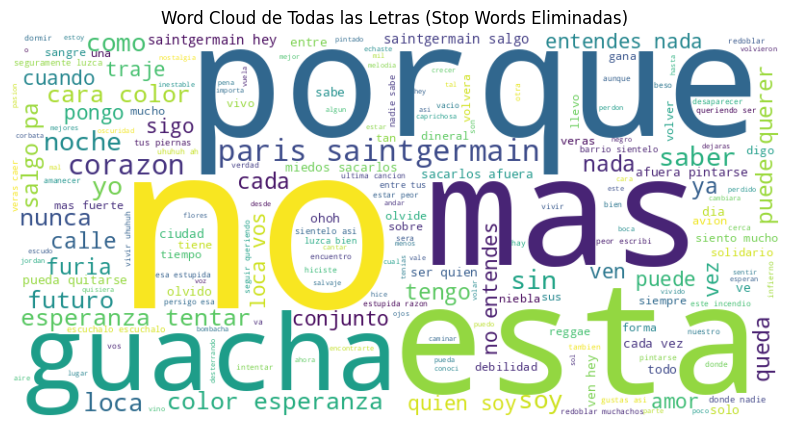

In [9]:
# Generar y mostrar el Word Cloud para todas las letras combinadas
all_lyrics = ' '.join(df['letra'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=spanish_stopwords).generate(all_lyrics)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Todas las Letras (Stop Words Eliminadas)')
plt.show()


In [10]:
# Vectorizar las letras usando CountVectorizer
vectorizer = CountVectorizer(stop_words=list(spanish_stopwords)).fit_transform(df['letra'])
vectors = vectorizer.toarray()

# Calcular la similitud de coseno entre las canciones
cosine_sim = cosine_similarity(vectors)

# Rellenar la diagonal con valores no relevantes (para evitar seleccionar la misma canción)
np.fill_diagonal(cosine_sim, np.nan)

# Convertir la matriz de similitud en un DataFrame para una visualización más fácil
similarity_df = pd.DataFrame(cosine_sim, index=df['cancion'], columns=df['cancion'])

# Mostrar la matriz de similitud
print("\nMatriz de Similitud de Coseno entre Canciones:")
similarity_df



Matriz de Similitud de Coseno entre Canciones:


cancion,A Redoblar,Me siento mucho mejor,Color esperanza,Por mil noches,Loca,El traje del PSG,En la ciudad de la furia,Soy,reggae de mi barrio,Olvidalo y volvera por más
cancion,,,,,,,,,,
A Redoblar,NaN,0.074737,0.062084,0.149753,0.058161,0.024582,0.049519,0.148996,0.033367,0.065417
Me siento mucho mejor,0.074737,NaN,0.058979,0.278831,0.246426,0.072652,0.044719,0.222427,0.051656,0.138101
Color esperanza,0.062084,0.058979,NaN,0.096057,0.038830,0.010059,0.023640,0.101613,0.054613,0.038935
Por mil noches,0.149753,0.278831,0.096057,NaN,0.316179,0.087869,0.082340,0.262325,0.094646,0.083763
Loca,0.058161,0.246426,0.038830,0.316179,NaN,0.076376,0.087917,0.229892,0.083924,0.042234
El traje del PSG,0.024582,0.072652,0.010059,0.087869,0.076376,NaN,0.036103,0.058625,0.039644,0.011562
En la ciudad de la furia,0.049519,0.044719,0.023640,0.082340,0.087917,0.036103,NaN,0.072171,0.043258,0.060493
Soy,0.148996,0.222427,0.101613,0.262325,0.229892,0.058625,0.072171,NaN,0.088679,0.039768
reggae de mi barrio,0.033367,0.051656,0.054613,0.094646,0.083924,0.039644,0.043258,0.088679,NaN,0.014386


In [11]:
# Desapilar la matriz de similitud en una serie ordenada por valor (del más alto al más bajo)
similarity_series = similarity_df.unstack().dropna()

# Restablecer el índice permitiendo duplicados en los nombres de las columnas
similarity_series = similarity_series.reset_index(allow_duplicates=True)

# Renombrar las columnas correctamente
similarity_series.columns = ['cancion1', 'cancion2', 'cosine']

# Crear un par ordenado para identificar duplicados
similarity_series['sorted_pair'] = similarity_series.apply(lambda row: tuple(sorted([row['cancion1'], row['cancion2']])), axis=1)

# Eliminar duplicados basados en el par ordenado
similarity_series = similarity_series.drop_duplicates(subset='sorted_pair')

# Eliminar la columna auxiliar
similarity_series = similarity_series.drop(columns='sorted_pair')

# Ahora similarity_series tiene los duplicados eliminados
similarity_series


,cancion1,cancion2,cosine
0,A Redoblar,Me siento mucho mejor,0.074737
1,A Redoblar,Color esperanza,0.062084
2,A Redoblar,Por mil noches,0.149753
3,A Redoblar,Loca,0.058161
4,A Redoblar,El traje del PSG,0.024582
5,A Redoblar,En la ciudad de la furia,0.049519
6,A Redoblar,Soy,0.148996
7,A Redoblar,reggae de mi barrio,0.033367
8,A Redoblar,Olvidalo y volvera por más,0.065417
10,Me siento mucho mejor,Color esperanza,0.058979


In [12]:
# Ordenar por valor de similitud
sorted_similarity = similarity_series.sort_values(by='cosine', ascending=False)

# Top 5 matches (mayor similitud)
top_5_matches = sorted_similarity.head(5)
print("\nTop 5 matches (canciones más similares):")
for i, row in enumerate(top_5_matches.itertuples(), 1):
    print(f"{i}. '{row.cancion1}' y '{row.cancion2}' con una similitud de {row.cosine:.4f}")



Top 5 matches (canciones más similares):
1. 'Por mil noches' y 'Loca' con una similitud de 0.3162
2. 'Me siento mucho mejor' y 'Por mil noches' con una similitud de 0.2788
3. 'Por mil noches' y 'Soy' con una similitud de 0.2623
4. 'Me siento mucho mejor' y 'Loca' con una similitud de 0.2464
5. 'Loca' y 'Soy' con una similitud de 0.2299


In [13]:
# Top 5 matches (mayor similitud)
top_5_matches = sorted_similarity.tail(5)
print("\nTop 5 matches (canciones más similares):")
for i, row in enumerate(top_5_matches.itertuples(), 1):
    print(f"{i}. '{row.cancion1}' y '{row.cancion2}' con una similitud de {row.cosine:.4f}")


Top 5 matches (canciones más similares):
1. 'A Redoblar' y 'El traje del PSG' con una similitud de 0.0246
2. 'Color esperanza' y 'En la ciudad de la furia' con una similitud de 0.0236
3. 'reggae de mi barrio' y 'Olvidalo y volvera por más' con una similitud de 0.0144
4. 'El traje del PSG' y 'Olvidalo y volvera por más' con una similitud de 0.0116
5. 'Color esperanza' y 'El traje del PSG' con una similitud de 0.0101


In [15]:
# Contar el número de palabras únicas en cada letra
df['unique_words'] = df['letra'].apply(lambda x: len(set(x.split())))

# Mostrar estadísticas de palabras únicas
print("\nEstadísticas descriptivas de la cantidad de palabras únicas en cada letra:")
print(df['unique_words'].describe())



Estadísticas descriptivas de la cantidad de palabras únicas en cada letra:
count     10.000000
mean      89.300000
std       21.113713
min       45.000000
25%       80.500000
50%       90.500000
75%      100.750000
max      125.000000
Name: unique_words, dtype: float64


In [16]:
df['share_unique_words']=df['unique_words']

# Mostrar la canción con mayor y menor diversidad de palabras
most_unique_words = df.loc[df['share_unique_words'].idxmax()]
least_unique_words = df.loc[df['share_unique_words'].idxmin()]

print(f"\nCanción con más palabras únicas: '{most_unique_words['cancion']}' de {most_unique_words['artista']} con {most_unique_words['share_unique_words']} palabras únicas.")
print(f"Canción con menos palabras únicas: '{least_unique_words['cancion']}' de {least_unique_words['artista']} con {least_unique_words['share_unique_words']} palabras únicas.")



Canción con más palabras únicas: 'Por mil noches' de Airbag con 125 palabras únicas.
Canción con menos palabras únicas: 'Me siento mucho mejor' de Charly Garcia con 45 palabras únicas.
